In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


## Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


removing the unnamed column

In [11]:
df= df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


performing EDA 

In [13]:
import matplotlib.pyplot as plt

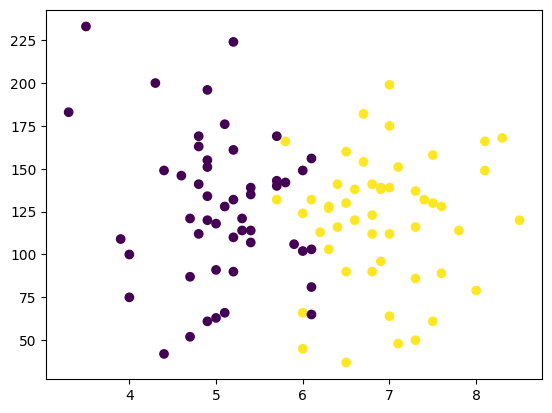

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
x = df.iloc[:,0:2]
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [16]:
y = df.iloc[:,2:]
y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
65,8.1,166.0
84,5.7,169.0
43,6.8,141.0
55,7.8,114.0
87,5.7,132.0
...,...,...
32,7.0,139.0
16,5.2,224.0
99,6.2,113.0
42,7.6,89.0


In [19]:
x_test

,cgpa,iq
38,6.5,160.0
92,5.2,110.0
93,6.8,112.0
46,5.3,114.0
69,8.5,120.0
79,6.5,90.0
37,8.1,149.0
22,4.9,120.0
35,6.8,90.0
2,5.3,121.0


In [20]:
y_test

,placement
38,1
92,0
93,1
46,0
69,1
79,1
37,1
22,0
35,1
2,0


In [21]:
y_train

,placement
65,1
84,0
43,1
55,1
87,1
...,...
32,1
16,0
99,1
42,1


## Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [25]:
x_train

array([[ 1.91358904,  1.01455282],
       [-0.2192037 ,  1.08725167],
       [ 0.75832631,  0.40872908],
       [ 1.64698995, -0.24556055],
       [-0.2192037 ,  0.19063254],
       [ 0.04739539,  0.60259268],
       [ 1.20265813, -0.19709466],
       [-0.48580279,  0.36026318],
       [-0.48580279, -0.4151912 ],
       [ 2.09132177,  1.06301872],
       [-0.93013461,  0.65105858],
       [-0.75240188,  0.09370074],
       [-1.37446643,  0.60259268],
       [-1.10786734, -0.89985019],
       [ 0.31399449, -0.512123  ],
       [ 1.20265813,  0.31179728],
       [-0.2192037 ,  0.45719498],
       [ 0.04739539, -0.00323106],
       [ 0.13626176,  0.77222332],
       [ 0.75832631, -0.02746401],
       [-0.13033733,  0.43296203],
       [-0.93013461,  1.7415413 ],
       [-1.4633328 ,  1.8384731 ],
       [-0.75240188, -1.40874213],
       [-2.35199644,  1.42651296],
       [-0.66353552, -0.82715134],
       [ 0.93605904,  1.23264936],
       [ 1.46925722,  0.09370074],
       [ 0.93605904,

In [26]:
x_test = scaler.fit_transform(x_test)

In [27]:
x_test

array([[ 0.09381173,  1.96866278],
       [-1.01487231, -0.40894927],
       [ 0.34966189, -0.31384479],
       [-0.92958893, -0.21874031],
       [ 1.79947948,  0.06657314],
       [ 0.09381173, -1.35999409],
       [ 1.45834593,  1.44558813],
       [-1.27072248,  0.06657314],
       [ 0.34966189, -1.35999409],
       [-0.92958893,  0.11412538]])

## training the model

In [28]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(x_train , y_train)

C:\Users\anmol sarin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## evaluate the model

In [39]:
y_predicted = clf.predict(x_test )
y_predicted

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [36]:
y_test

,placement
38,1
92,0
93,1
46,0
69,1
79,1
37,1
22,0
35,1
2,0


## checking the accuracy

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test , y_predicted)

1.0

## Visualising the output

In [42]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from mlxtend.plotting import plot_decision_regions

In [49]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

AttributeError: 'DataFrame' object has no attribute 'value'

In [ ]:
IMPORT 